# FCS released by WFP (vam food security analysis)

The complete version of the data released by WFP regarding the Food Consumption Score (FCS). For more details, see the notebook of the demo version.

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import numpy as np
import ntpath
import glob
plt.style.use("ggplot")

In [2]:
path = "./wfp_data/"
all_files = glob.glob(path + "*.csv")

dfs = []

for filename in all_files:
    df = pd.read_csv(filename)
    df["Country"] = ntpath.basename(filename).split(".")[0]
    dfs.append(df)

df = pd.concat(dfs, axis = 0, ignore_index = True)
df.head()

,SvyDate,Date,Dmgrph,DmgrphCode,Mean_crrnt,Pop,PopNmbr,Country
0,2019-7-15_2019-9-8,2019-09-08,BOUCLE-DU-MOUHOUN,900712.0,30.921705,1976217,611079,Burkina Faso
1,2019-7-15_2019-9-8,2019-09-08,CASCADES,900713.0,22.732405,822445,186961,Burkina Faso
2,2019-7-15_2019-9-8,2019-09-08,CENTRE,900714.0,22.093784,2854356,630635,Burkina Faso
3,2019-7-15_2019-9-8,2019-09-08,CENTRE-EST,900715.0,44.186047,2854356,1261227,Burkina Faso
4,2019-7-15_2019-9-8,2019-09-08,CENTRE-NORD,900716.0,61.948843,1687858,1045608,Burkina Faso


### Brief keys description

- *SvyDate*: reference period of the data collection.
- *Date*: reference date (i.e. the end of the reference period). 
- *Dmgrph*: administrative area name.
- *DmgrphCode*: a code for identyfing the adminstrata.
- *Mean_crrnt*: % of people with poor and borderline FCS.
- *Pop*: area population size.
- *PopNmbr*: number of people with poor and borderline FCS (i.e. Mean_crrnt * Pop).

In [3]:
# Check if the dataframe contains NaN values.
df.isnull().sum()

SvyDate          0
Date             0
Dmgrph           0
DmgrphCode    1620
Mean_crrnt       0
Pop              0
PopNmbr          0
Country          0
dtype: int64

In [4]:
# Let's delete the item 'DmgrphCode'.
df.drop(["DmgrphCode"], axis = 1, inplace = True) 

In [5]:
# Rename some columns.
df.rename(columns = {"Date": "Datetime", "Dmgrph": "AdminStrata", "Mean_crrnt": "Metric"}, inplace = True)

In [6]:
df.head()

,SvyDate,Datetime,AdminStrata,Metric,Pop,PopNmbr,Country
0,2019-7-15_2019-9-8,2019-09-08,BOUCLE-DU-MOUHOUN,30.921705,1976217,611079,Burkina Faso
1,2019-7-15_2019-9-8,2019-09-08,CASCADES,22.732405,822445,186961,Burkina Faso
2,2019-7-15_2019-9-8,2019-09-08,CENTRE,22.093784,2854356,630635,Burkina Faso
3,2019-7-15_2019-9-8,2019-09-08,CENTRE-EST,44.186047,2854356,1261227,Burkina Faso
4,2019-7-15_2019-9-8,2019-09-08,CENTRE-NORD,61.948843,1687858,1045608,Burkina Faso


### Country key

In [7]:
print("The countries are:", ", ".join(df.Country.unique()))

The countries are: Burkina Faso, Nigeria, Syria, Yemen


### AdminStrata key

In [8]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen**: the administrative division of Yemen is divided into two main divisions (governorates and districts). There are 22 governorates, including the capital Sana'a (Amanat Al Asimah) and Socotra Archipelago. The FCS dataframe has the values of all the 22 governorates.

In [9]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(['Abyan', 'Al Hudaydah', 'Al Jawf', 'Al Maharah', 'Al Mahwit',
       'Amanat Al Asimah', 'Amran', 'Dhamar', 'Hadramaut', 'Hajjah',
       'Ibb', 'Lahj', 'Marib', 'Raymah', "Sa'ada", "Sana'a", 'Shabwah',
       'Taizz', 'Aden', 'Al Bayda', "Al Dhale'e", 'Socotra'], dtype=object)

- **Nigeria**: Nigeria is divided into 36 states. The AdminStrata items of the FCS dataframe cover 3 states (Adamawa, Borno and Yobe) and each of these state is diveded into three parts: North, South, Central.

In [10]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(9,)


array(['Adamawa Central', 'Adamawa North', 'Adamawa South',
       'Borno Central', 'Borno North', 'Borno South', 'Yobe East',
       'Yobe North', 'Yobe South'], dtype=object)

- **Syria**: the governatores of the Syria country are 14. The FCS dataframe has the values of 13 governorates (Idlib governatore not included).

In [11]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(13,)


array(['Tartous', 'Al-Hasakeh', 'Aleppo', 'As-Sweida', 'Damascus',
       "Dar'a", 'Hama', 'Homs', 'Lattakia', 'Rural Damascus', 'Ar-Raqqa',
       'Deir-ez-Zor', 'Quneitra'], dtype=object)

- **Burkina Faso**: Burkina Faso is divided into 13 administrative regions. The FCS dataframe has the values of all 13 regions.

In [12]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['BOUCLE-DU-MOUHOUN', 'CASCADES', 'CENTRE', 'CENTRE-EST',
       'CENTRE-NORD', 'CENTRE-OUEST', 'CENTRE-SUD', 'EST',
       'HAUTS-BASSINS', 'NORD', 'PLATEAU-CENTRAL', 'SAHEL', 'SUD-OUEST'],
      dtype=object)

In [13]:
# The strings of AdminStrata key for Burkina Faso country are uppercase, I change them to obtain lowercase with first capital letter.
def to_lower(country, admin):
    if country == "Burkina Faso":
        admin = admin.lower().title()      
    return admin
    
df["AdminStrata"] = df[["Country", "AdminStrata"]].apply(lambda x: to_lower(*x), axis = 1)

In [14]:
# Check the min e max values of the Metric.
print(df.Metric.min(), df.Metric.max())

2.24791265253693 84.55928979074173


In [15]:
# Creation of an accurate datetime format (not consider the item 'SvyDate').
df.drop(["SvyDate"], axis = 1, inplace = True) 
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.sort_values("Datetime", ascending = True, inplace = True) # Sort on datetime.
df = df.groupby(["Country", "AdminStrata"]).apply(lambda group: group.set_index("Datetime").resample("D").mean()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

,Country,AdminStrata,Datetime,Metric,Pop,PopNmbr
0,Burkina Faso,Boucle-Du-Mouhoun,2019-09-08,30.921705,1976217.0,611079.0
1,Burkina Faso,Boucle-Du-Mouhoun,2019-09-09,31.103928,1976217.0,614681.0
2,Burkina Faso,Boucle-Du-Mouhoun,2019-09-10,32.030296,1976217.0,632988.0
3,Burkina Faso,Boucle-Du-Mouhoun,2019-09-11,32.167300,1976217.0,635695.0
4,Burkina Faso,Boucle-Du-Mouhoun,2019-09-12,31.770045,1976217.0,627845.0


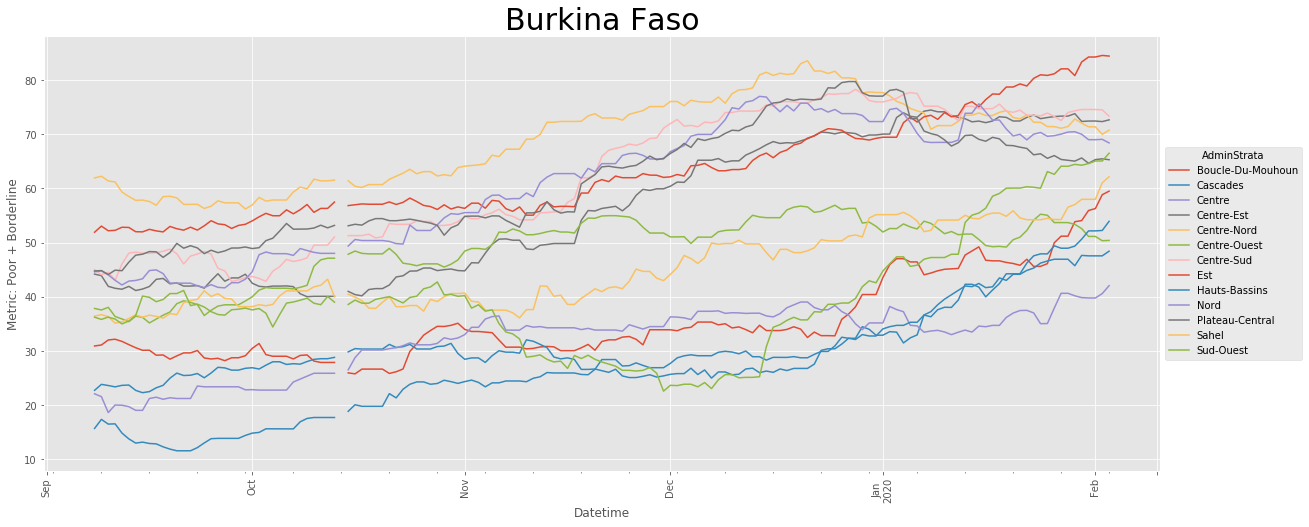

Temporal range survey: 2019-09-08 00:00:00 2020-02-03 00:00:00
Length of the time-serie: 149
The adminstarata common missing dates are: DatetimeIndex(['2019-10-14'], dtype='datetime64[ns]', name='Datetime', freq=None)


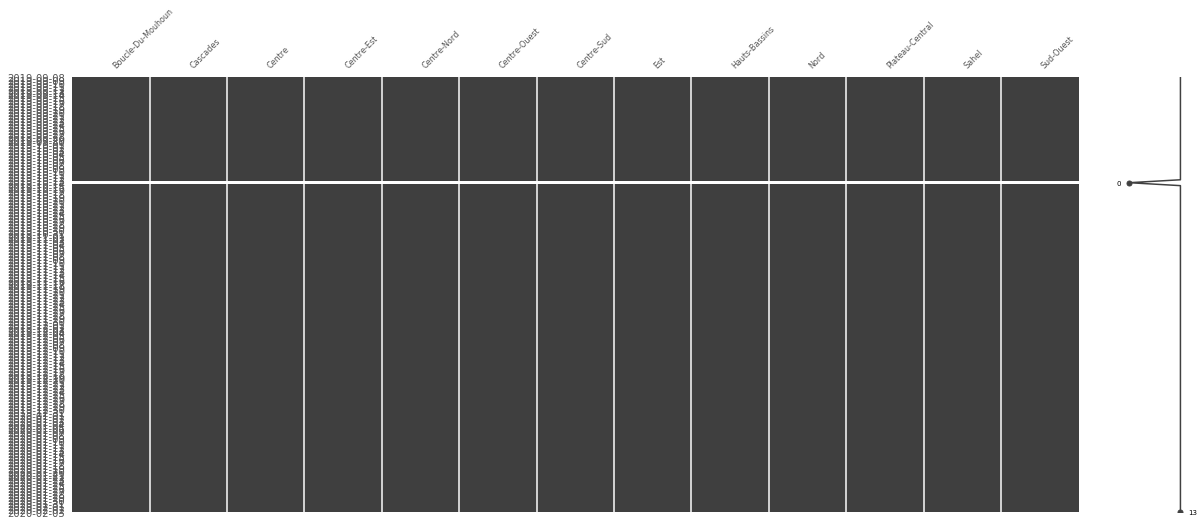

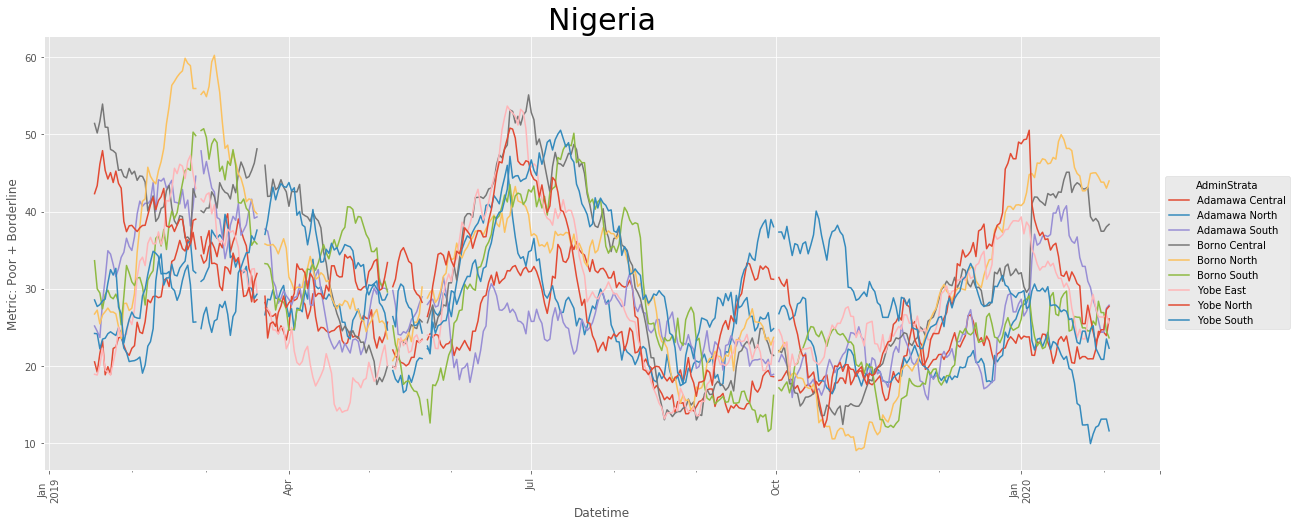

Temporal range survey: 2019-01-18 00:00:00 2020-02-03 00:00:00
Length of the time-serie: 382
The adminstarata common missing dates are: DatetimeIndex(['2019-02-26', '2019-03-21', '2019-03-22', '2019-05-09',
               '2019-05-22', '2019-10-01'],
              dtype='datetime64[ns]', name='Datetime', freq=None)


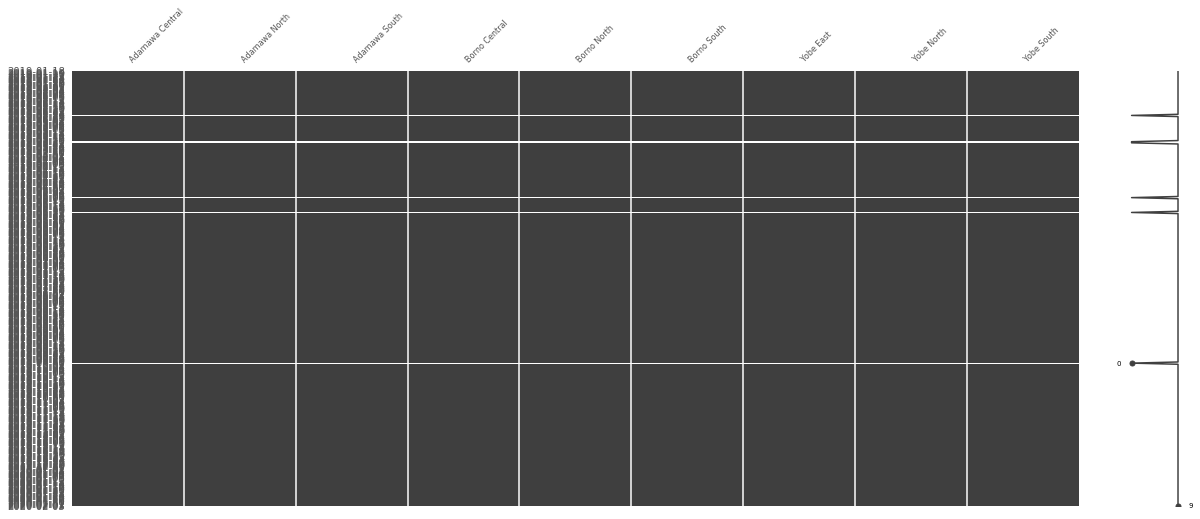

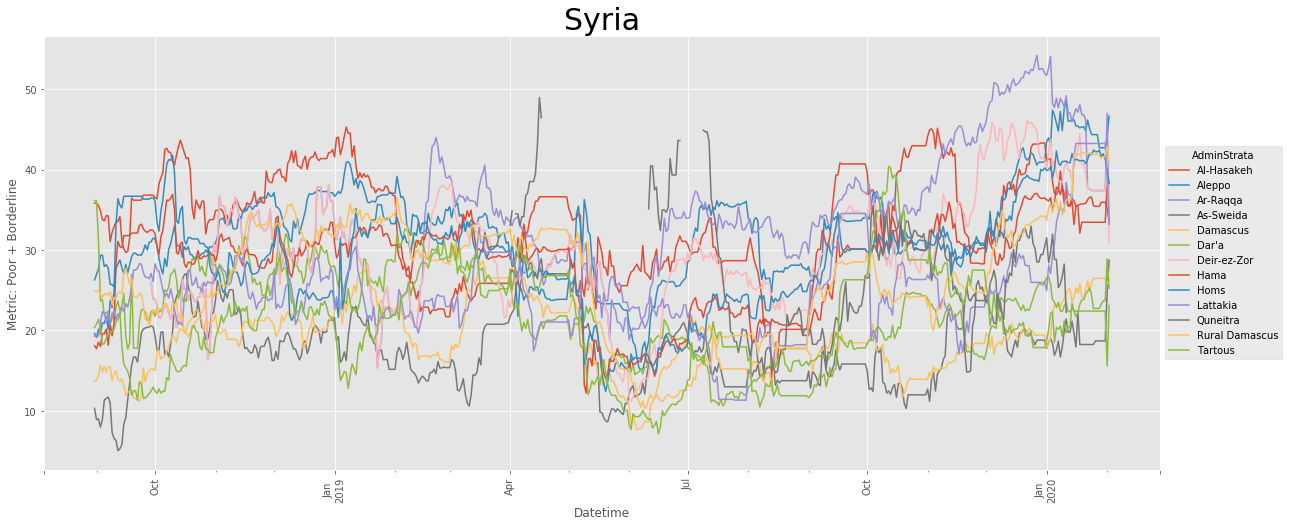

Temporal range survey: 2018-08-31 00:00:00 2020-02-02 00:00:00
Length of the time-serie: 521
The adminstarata common missing dates are: DatetimeIndex([], dtype='datetime64[ns]', name='Datetime', freq=None)


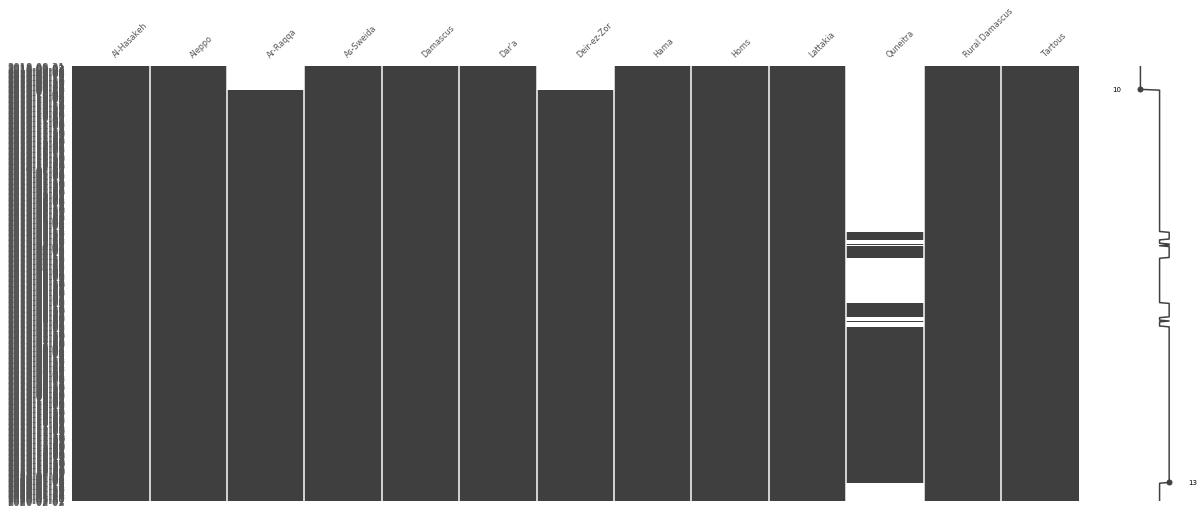

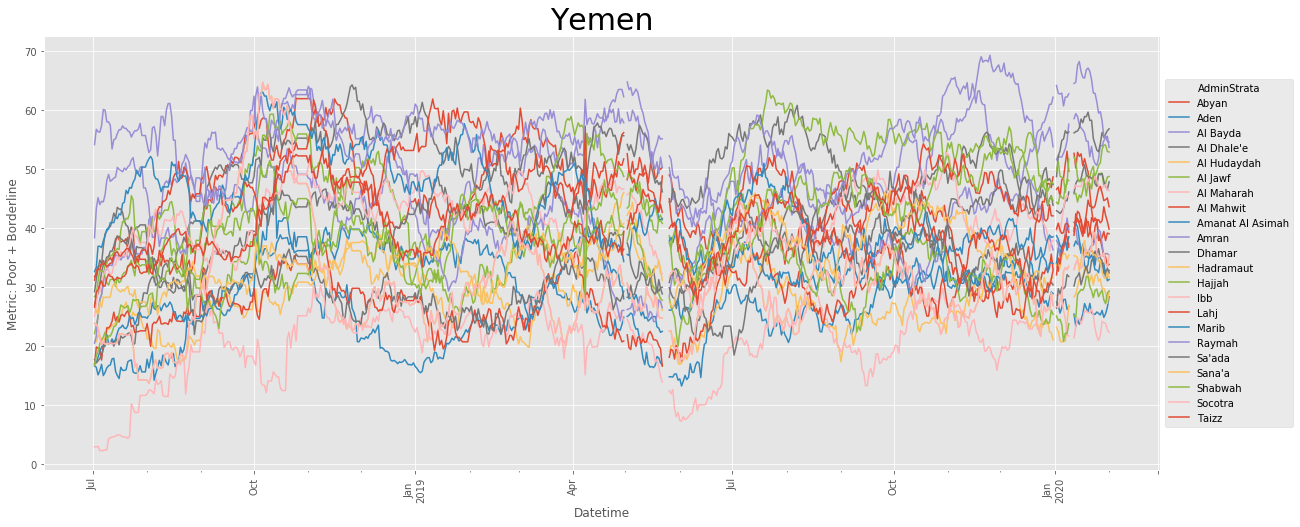

Temporal range survey: 2018-07-02 00:00:00 2020-02-01 00:00:00
Length of the time-serie: 580
The adminstarata common missing dates are: DatetimeIndex(['2019-05-01', '2019-05-23', '2019-05-24', '2019-05-25',
               '2020-01-01', '2020-01-10', '2020-01-11'],
              dtype='datetime64[ns]', name='Datetime', freq=None)


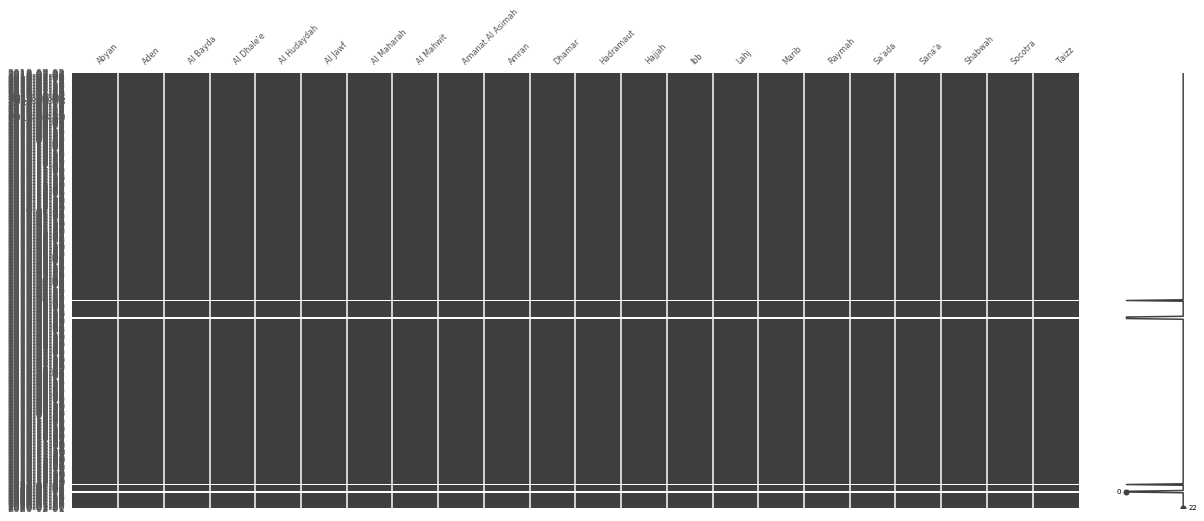

In [16]:
for country in df.Country.unique():
    sub_df = df[df.Country == country]
    f = plt.figure(figsize = (20, 8))
    plt.title(country, color = "black", fontsize = 30)
    sub_df = sub_df.groupby(["Datetime", "AdminStrata"]).mean()["Metric"].unstack()
    sub_df.plot(ax = f.gca(), style = "-")
    plt.legend(title = "AdminStrata", loc = "center left", bbox_to_anchor = (1.0, 0.5))
    plt.ylabel("Metric: Poor + Borderline")
    plt.xticks(rotation = 90)
    plt.autoscale()
    plt.show()
    
    miss = msno.matrix(sub_df.set_index(pd.period_range(sub_df.index[0], sub_df.index[-1], freq = "D")), 
                       freq = "D", figsize = (20, 8), fontsize = 8)
    
    print("Temporal range survey:", sub_df.index[0], sub_df.index[-1])
    print("Length of the time-serie:", len(sub_df))
    print("The adminstarata common missing dates are:", sub_df.isna()[(sub_df.isna() != False).all(1)].index)

## Adjusting the time-series

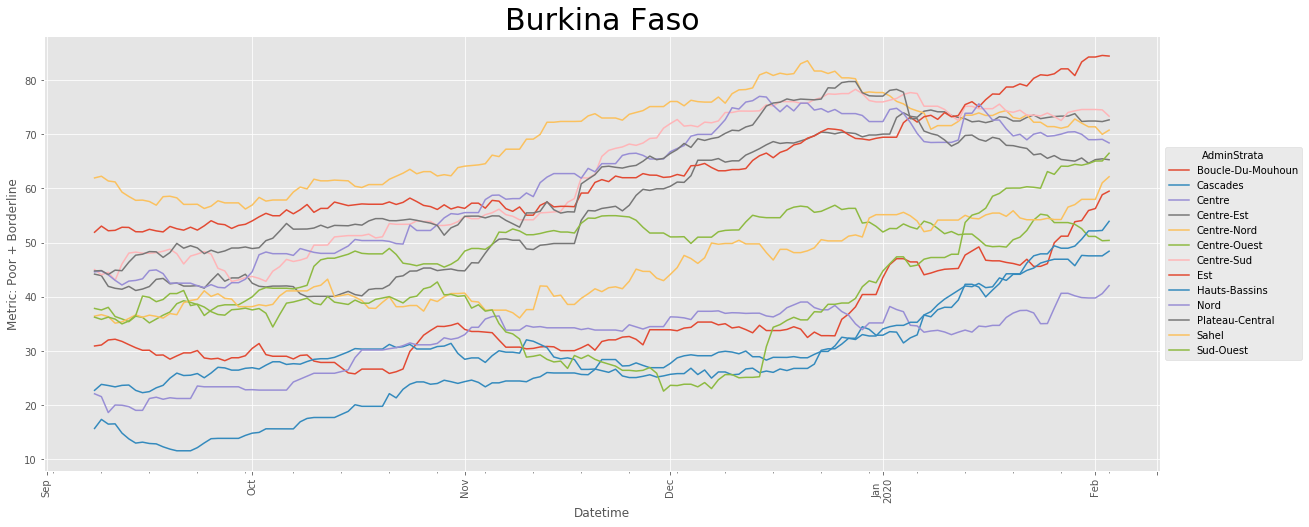

Temporal range survey: 2019-09-08 00:00:00 2020-02-03 00:00:00
Length of the time-serie: 149


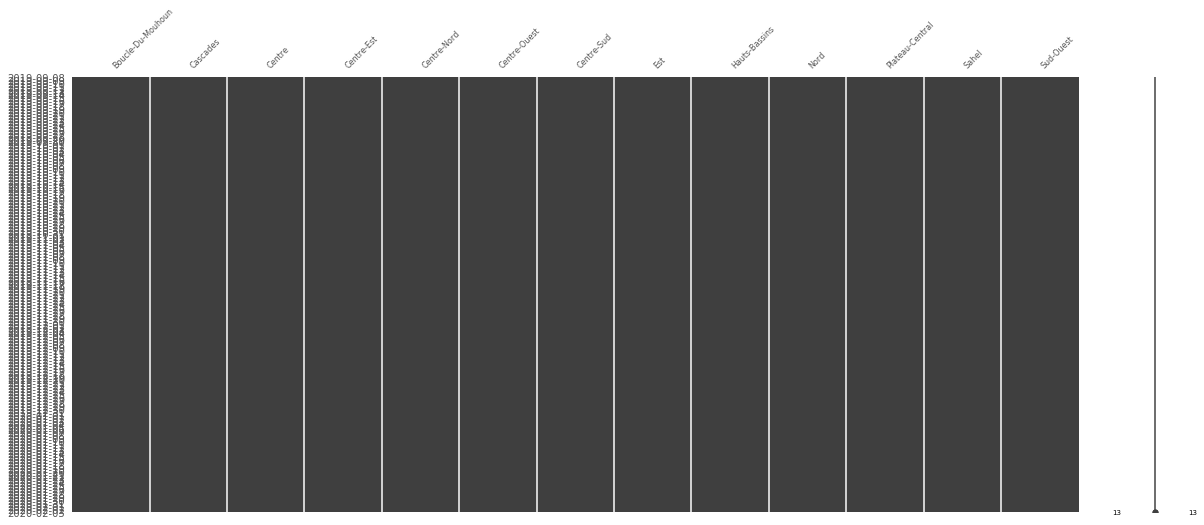

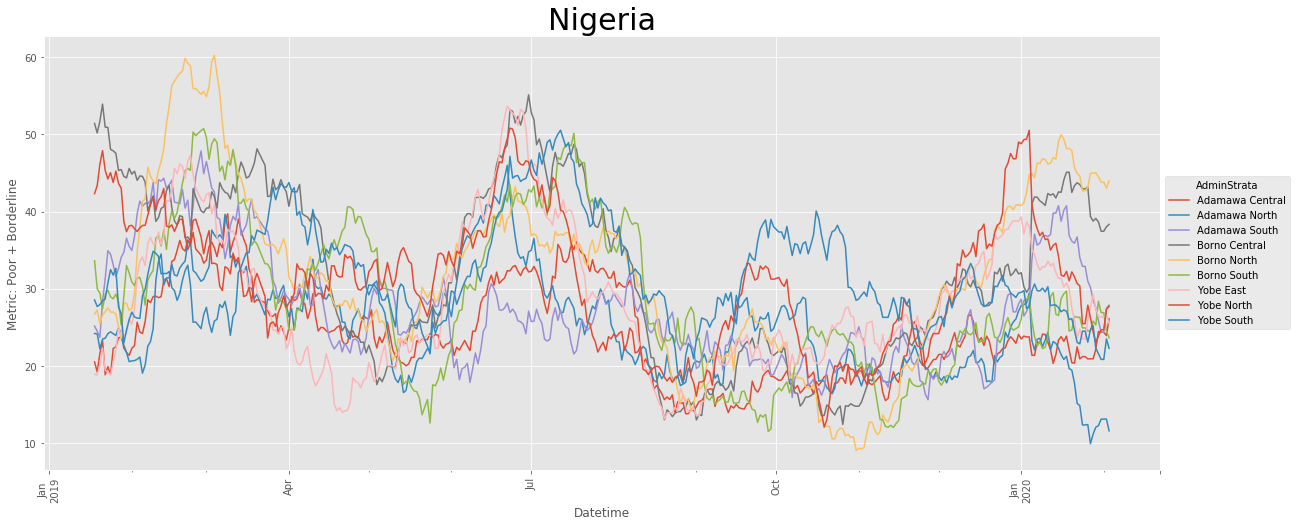

Temporal range survey: 2019-01-18 00:00:00 2020-02-03 00:00:00
Length of the time-serie: 382


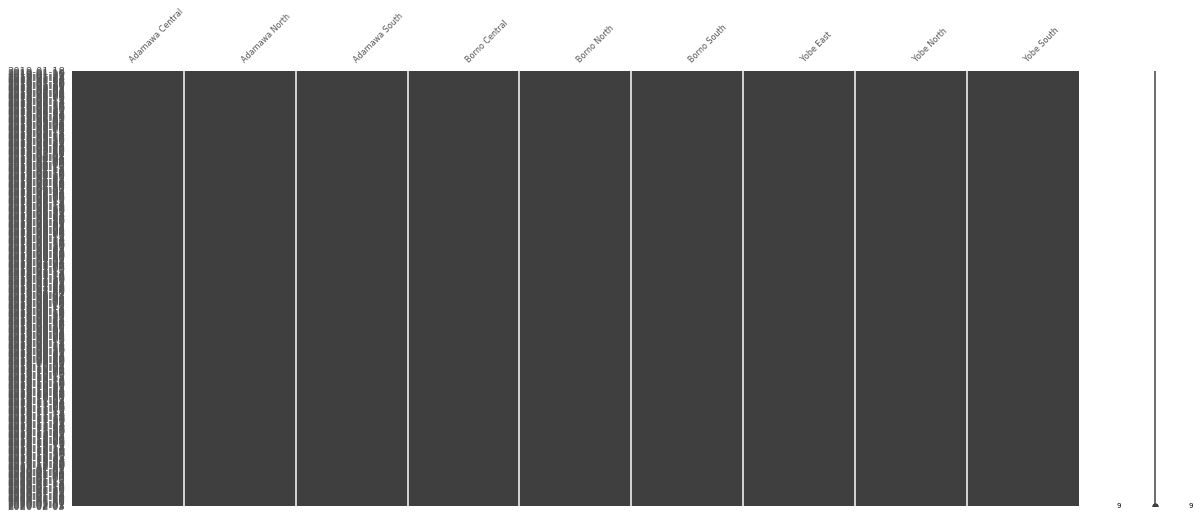

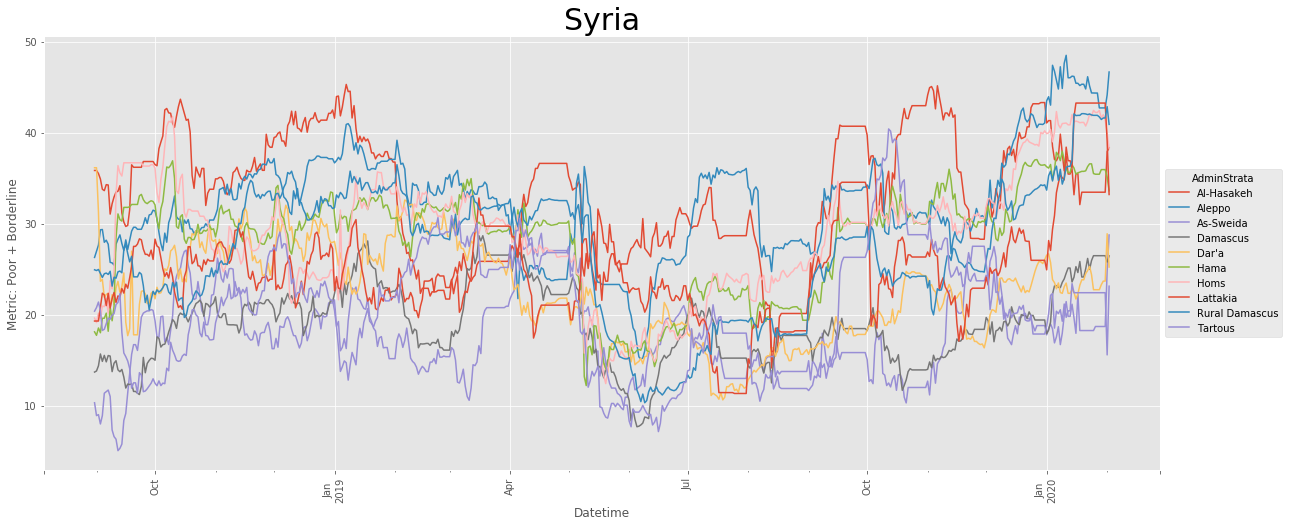

Temporal range survey: 2018-08-31 00:00:00 2020-02-02 00:00:00
Length of the time-serie: 521


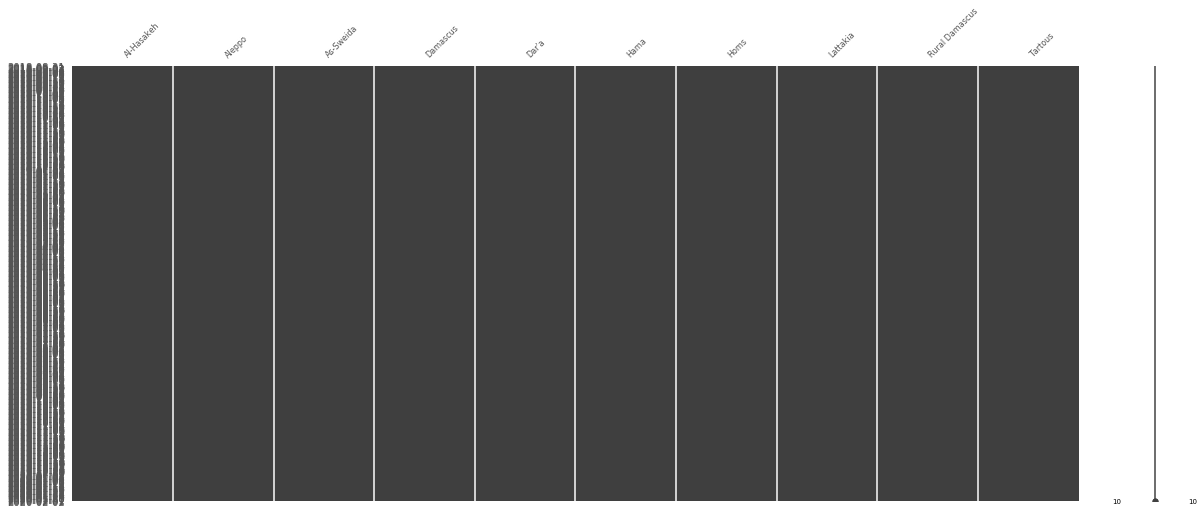

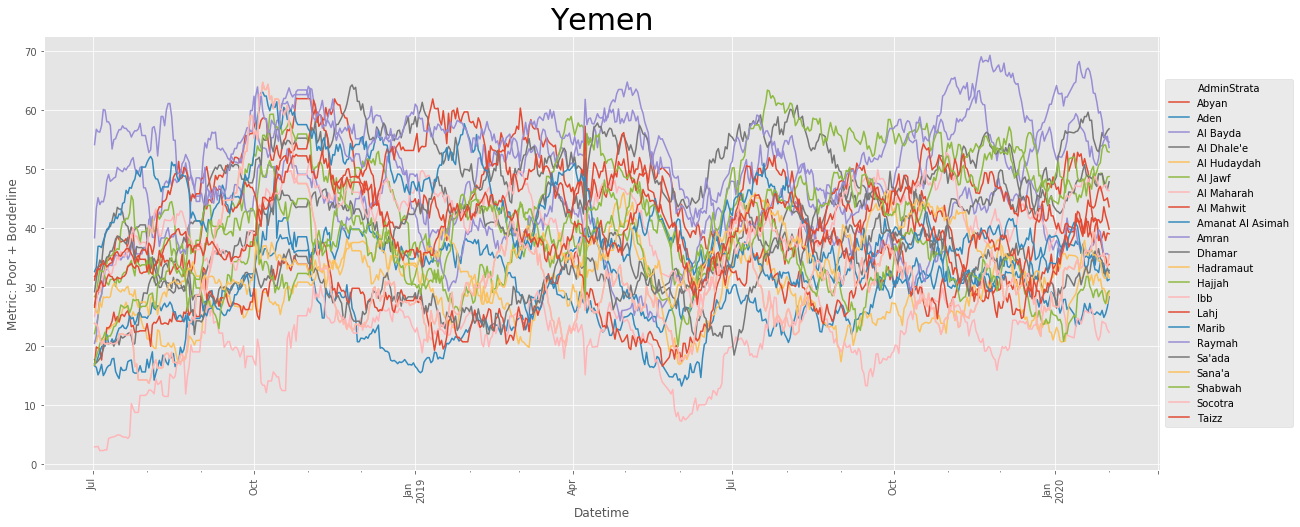

Temporal range survey: 2018-07-02 00:00:00 2020-02-01 00:00:00
Length of the time-serie: 580


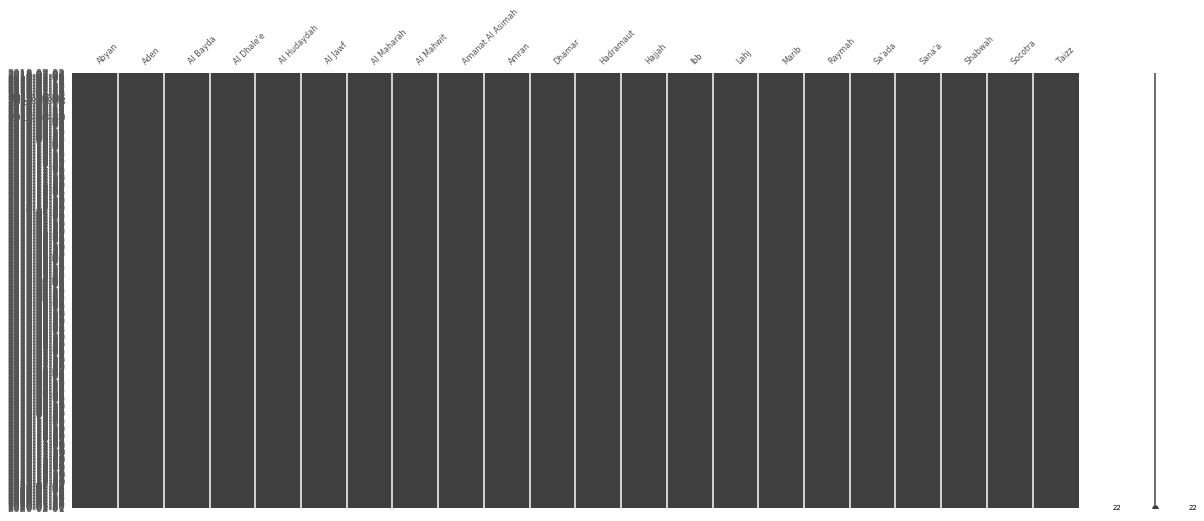

In [17]:
for country in df.Country.unique():
    sub_df = df[df.Country == country]
    sub_df = sub_df.groupby(["Datetime", "AdminStrata"]).mean()["Metric"].unstack()
    # Fill the small gaps of the time-series (max a week) using a linear interpolation.
    sub_df = sub_df.interpolate(method = "linear", limit = 7)
    # Delete time-series that still have some NaN values.
    sub_df.dropna(inplace = True, axis = 1)
    f = plt.figure(figsize = (20, 8))
    plt.title(country, color = "black", fontsize = 30)
    sub_df.plot(ax = f.gca(), style = "-")
    plt.legend(title = "AdminStrata", loc = "center left", bbox_to_anchor = (1.0, 0.5))
    plt.ylabel("Metric: Poor + Borderline")
    plt.xticks(rotation = 90)
    plt.autoscale()
    plt.show()
    
    miss = msno.matrix(sub_df.set_index(pd.period_range(sub_df.index[0], sub_df.index[-1], freq = "D")), 
                       freq = "D", figsize = (20, 8), fontsize = 8)
    
    print("Temporal range survey:", sub_df.index[0], sub_df.index[-1])
    print("Length of the time-serie:", len(sub_df))
    
    sub_df = sub_df.add_prefix("FCS_")
    sub_df.to_csv("./time-series/wfp_fcs_" + country + ".csv", index_label = False)